<a href="https://colab.research.google.com/github/ArpanMahato99/ML-Lab/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=open('iris_tree.dot','w'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [4]:
 !dot -Tpng iris_tree.dot -o iris_tree.png

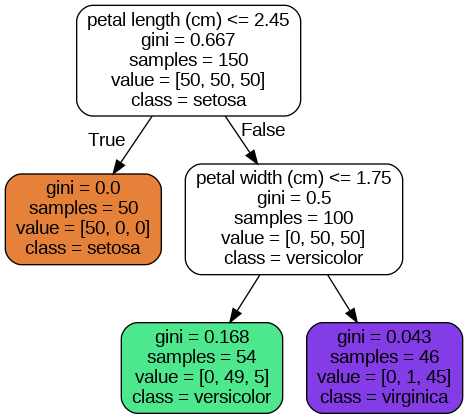

In [5]:
from IPython.display import Image
Image(filename = 'iris_tree.png')

In [22]:
labels = ['Setosa', 'Versicolor', 'Virginica']

In [28]:
tree_clf.predict_proba([[5,1.5]])[0]

array([0.        , 0.90740741, 0.09259259])

In [29]:
predicted_value = tree_clf.predict([[7,2.1]])[0]
labels[predicted_value]

'Virginica'

### RANDOM FOREST + LOGISTIC REGRESSION + SUPPORT VECTOR CLASSIFIER


In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
# Generate the Moon dataset
x, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf), ('lf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('lf', RandomForestClassifier()), ('svc', SVC())])

In [10]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.82
RandomForestClassifier 0.915
SVC 0.915
VotingClassifier 0.905


## Bagging Classifier in Decision Tree (Ensemble)


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [31]:
dec_clf = DecisionTreeClassifier(max_depth = 2)
dec_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
accuracy_score(y_test, y_pred)

0.91

In [33]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-2, 2, 500))

In [34]:
import matplotlib.pyplot as plt

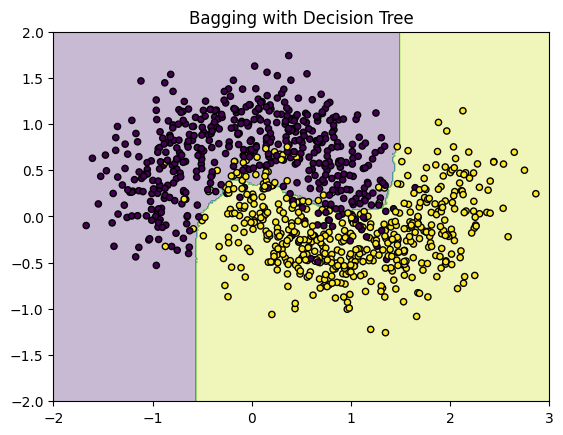

In [36]:
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Decision Tree')
plt.show()

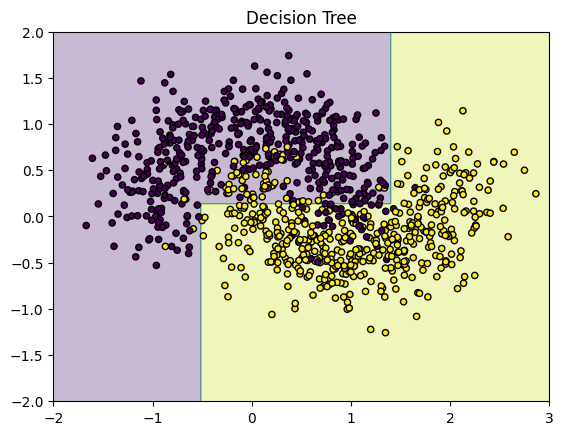

In [37]:
Z = dec_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Decision Tree')
plt.show()

In [38]:
bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bagg_clf.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [39]:
bagg_clf.oob_score_

0.905

In [40]:
from sklearn.metrics import accuracy_score
y_pred = bagg_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.91

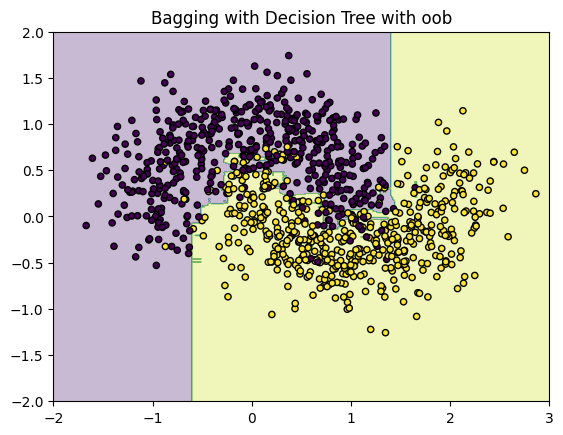

In [41]:
Z = bagg_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Decision Tree with oob')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

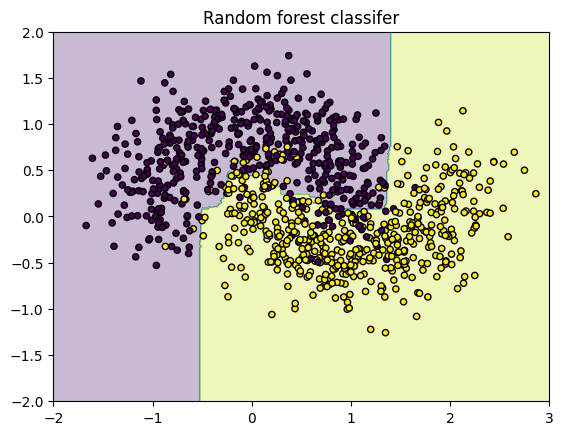

In [43]:
Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Random forest classifer')
plt.show()

In [44]:
bagging_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bagging_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

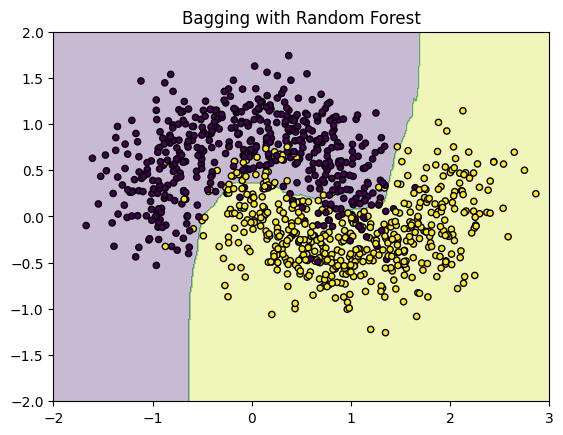

In [45]:
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Random Forest')
plt.show()

In [46]:
rnd_oob_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, oob_score=True)
rnd_oob_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1, oob_score=True)

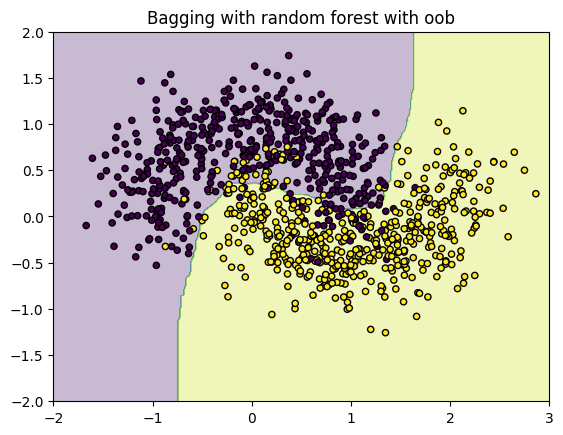

In [47]:
Z = rnd_oob_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with random forest with oob')
plt.show()